In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#导入数据
train = pd.read_csv(r'titanic\train.csv')
test = pd.read_csv(r'titanic\test.csv')
PassengerId = test['PassengerId'] # 测试集的passengerid
all_data = pd.concat([train,test],ignore_index= True) #竖向拼接

D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [7]:
#总体预览
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### PassengerID(id) Survived(存活与否) Pclass(客舱等级，较为重要) Name(可提取出更多信息) Sex(性别，较为重要) Age(较为重要) Parch(直系亲友) SibSp(旁系) Ticket(票编号) Cabin(客舱编号)Embarked(上船的港口编号)

In [8]:
train.info() #训练集的相关信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### 数据初步分析，使用统计学和绘图 目的：初步了解数据之间的相关性，为构造特征工程以及模型建立做准备

In [9]:
train['Survived'].value_counts()  #存活与否计数

0    549
1    342
Name: Survived, dtype: int64

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


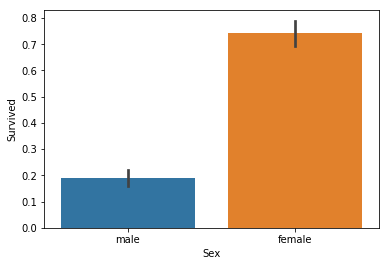

In [10]:
#女性幸存率远高于男性
sns.barplot(x = 'Sex', y = 'Survived',data = train) #柱状图 看男女幸存情况

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


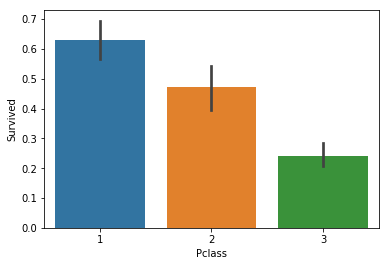

In [11]:
# 乘客社会等级越高，幸存率越高
sns.barplot(x = 'Pclass' , y = 'Survived',data = train)

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


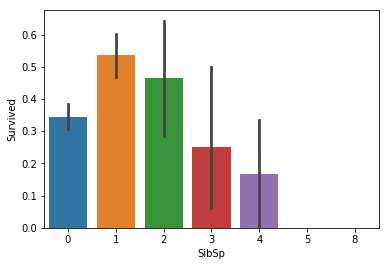

In [12]:
# 配偶及兄弟姐妹数适中的乘客幸存率更高
sns.barplot(x = 'SibSp', y = 'Survived', data = train)

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


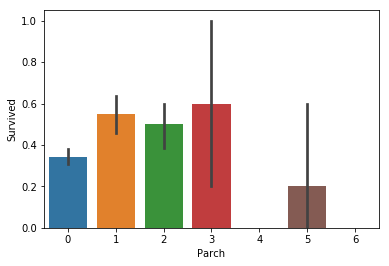

In [13]:
# 父母与子女数适中的乘客幸存率更高
sns.barplot(x = 'Parch',y = 'Survived',data = train)

Text(12.359751157407416, 0.5, 'density')

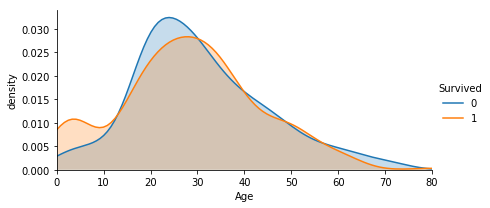

In [23]:
#FacetGrid用于绘制各变量之间的关系图
'''从不同生还情况的密度图可以看出，在年龄15岁的左侧，生还率有明显的区别，密度图非交叉区域面积非常大，但在其他年龄
段，则区别不是很明显，认为是随机所致，因此可以考虑将此年龄偏小的区域分离出来'''
facet = sns.FacetGrid(train,hue = 'Survived',aspect=2)  #hue变量名 aspect综合比
facet.map(sns.kdeplot,'Age',shade = True)  #kdeplot 核密度估计图 有阴影
facet.set(xlim = (0,train['Age'].max()))
facet.add_legend()  #右侧标签
plt.xlabel('Age')   #添加横纵坐标
plt.ylabel('density')

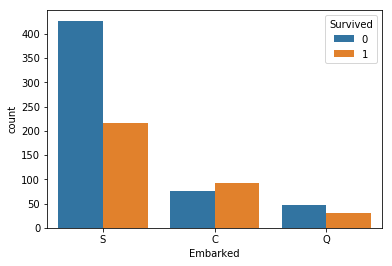

In [24]:
# Embarked 登港港口与生存情况的分析 结果分析：C地的生存率更高 保留为模型特征
sns.countplot('Embarked',hue = 'Survived',data = train)  # countplot 以bar的形式展示每个类别的数量 
#统计data中‘Embarked’这个特征每种类别的数量

In [ ]:
# Title Feature(new) 不同称呼的乘客幸存率不同
# 新增Title特征 从姓名中提取乘客的称呼 归纳为六类
all_data['Title'] = all_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip()) 
#strip() 移除字符串头尾指定的字符（默认为空格或换行符)
Title_Dict = {}
# update() 函数把字典dict2的键/值对更新到dict里。
Title_Dict.update()